>LR 0.497 (0.072)
>LDA 0.519 (0.072)
>NB 0.639 (0.049)
>GPC 0.219 (0.061)
>SVM 0.436 (0.077)


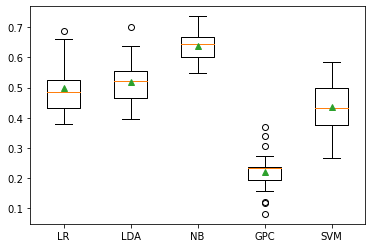

Good Customer
Bad customer


In [17]:
# fit a model and make predictions for the german credit dataset
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
 
# load the dataset
def load_dataset():
# load the dataset as a numpy array
    dataframe = read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data",\
               sep=" ",header=None)
# split into inputs and outputs
    last_ix = len(dataframe.columns) - 1
    X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
# select categorical and numerical features
    cat_ix = X.select_dtypes(include=['object', 'bool']).columns
    num_ix = X.select_dtypes(include=['int64', 'float64']).columns
# label encode the target variable to have the classes 0 and 1
    y = LabelEncoder().fit_transform(y)
    return X.values, y, cat_ix, num_ix
 # calculate f2-measure
def f2_measure(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)

# evaluate a model
def evaluate_model(X, y, model):
# define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the model evaluation metric
    metric = make_scorer(f2_measure)
# evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores

# define models to test
def get_models():
    models, names = list(), list()
# LR
    models.append(LogisticRegression(solver='liblinear'))
    names.append('LR')
# LDA
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    # NB
    models.append(GaussianNB())
    names.append('NB')
# GPC
    models.append(GaussianProcessClassifier())
    names.append('GPC')
# SVM
    models.append(SVC(gamma='scale'))
    names.append('SVM')
    return models, names

# load the dataset
X, y, cat_ix, num_ix = load_dataset()

models, names = get_models()
results = list()
# evaluate each model
for i in range(len(models)):
# one hot encode categorical, normalize numerical
    ct = ColumnTransformer([('c',OneHotEncoder(),cat_ix), ('n',MinMaxScaler(),num_ix)])
# wrap the model i a pipeline
    pipeline = Pipeline(steps=[('t',ct),('m',models[i])])
# evaluate the model and store results
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)
# summarize and store
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# define model to evaluate
model = LogisticRegression(solver='liblinear', class_weight='balanced')
# one hot encode categorical, normalize numerical
ct = ColumnTransformer([('c',OneHotEncoder(),cat_ix), ('n',MinMaxScaler(),num_ix)])
# scale, then undersample, then fit model
pipeline = Pipeline(steps=[('t',ct),  ('m',model)])
# fit the model
pipeline.fit(X, y)


# Predict function
def predict_customer (data):
    yhat = pipeline.predict([data])
    label = yhat[0]
    if label==0:
        print ("Good Customer")
    else:
        print ('Bad customer')
        

        
# evaluate on some good and bad customers cases (known class 0)
predict_customer(['A11', 6, 'A34', 'A43', 1169, 'A65', 'A75', 4, 'A93', 'A101', 4, 'A121', 67, 'A143', 'A152', 2, 'A173', 1, 'A192', 'A201'])
predict_customer(['A13', 18, 'A32', 'A43', 2100, 'A61', 'A73', 4, 'A93', 'A102', 2, 'A121', 37, 'A142', 'A152', 1, 'A173', 1, 'A191', 'A201'])   
